In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn import model_selection

# DATA

In [3]:
columns=['page_pop','page_visits','page_interest','page_category',
         'cc1_min','cc1_max','cc1_avg','cc1_med','cc1_std',
         'cc2_min','cc2_max','cc2_avg','cc2_med','cc2_std',
         'cc3_min','cc3_max','cc3_avg','cc3_med','cc3_std',
         'cc4_min','cc4_max','cc4_avg','cc4_med','cc4_std',
         'cc5_min','cc5_max','cc5_avg','cc5_med','cc5_std',
         'CC1','CC2','CC3','CC4','CC5',
         'base_time','post_length','post_shares','post_promo',
         'hour_target',
         'sunday_pub','monday_pub','tuesday_pub','wednesday_pub','thursday_pub','friday_pub','saturday_pub',
         'sunday_base','monday_base','tuesday_base','wednesday_base','thursday_base','friday_base','saturday_base',
         'target'
        ]

url='http://helene-p.fr/Dataset/Training/Features_Variant_1.csv'
df = pd.read_csv(url,header=None,names=columns)
df.head()

,page_pop,page_visits,page_interest,page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


A first glance at the data : 
- no strings
- binary,categorical or continous 

# How is the data ? 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   page_pop        40949 non-null  int64  
 1   page_visits     40949 non-null  int64  
 2   page_interest   40949 non-null  int64  
 3   page_category   40949 non-null  int64  
 4   cc1_min         40949 non-null  float64
 5   cc1_max         40949 non-null  float64
 6   cc1_avg         40949 non-null  float64
 7   cc1_med         40949 non-null  float64
 8   cc1_std         40949 non-null  float64
 9   cc2_min         40949 non-null  float64
 10  cc2_max         40949 non-null  float64
 11  cc2_avg         40949 non-null  float64
 12  cc2_med         40949 non-null  float64
 13  cc2_std         40949 non-null  float64
 14  cc3_min         40949 non-null  float64
 15  cc3_max         40949 non-null  float64
 16  cc3_avg         40949 non-null  float64
 17  cc3_med         40949 non-null 

In [5]:
df.describe()

,page_pop,page_visits,page_interest,page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
count,4.094900e+04,40949.000000,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,...,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000
mean,1.313814e+06,4676.133752,4.480025e+04,24.254780,1.586241,443.333854,55.720384,35.645535,67.464151,0.219468,...,0.146157,0.136926,0.141640,0.132506,0.137635,0.148599,0.150846,0.143886,0.144888,7.322889
std,6.785752e+06,20593.184863,1.109338e+05,19.950583,20.753174,496.695198,86.933548,69.960232,81.568249,10.055146,...,0.353268,0.343774,0.348684,0.339045,0.344520,0.355698,0.357903,0.350979,0.351992,35.494550
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,45.000000,5.527273,2.000000,8.278756,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.929110e+05,0.000000,7.045000e+03,18.000000,0.000000,241.000000,23.374101,12.000000,35.069140,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,717.000000,71.828829,42.000000,102.554954,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2341.000000,2341.000000,2341.000000,2341.000000,731.394558,1923.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1305.000000


#### categorical features :
- page_category

#### binary
- sunday_pub, monday_pub, tuesday_pub, wednesday_pub, thursday_pub, friday_pub, saturday_pub
- sunday_base, monday_base, tuesday_base, wednesday_base, thursday_base, friday_base, saturday_base

### are there some NA ? 

In [6]:
df.isna().any()

page_pop          False
page_visits       False
page_interest     False
page_category     False
cc1_min           False
cc1_max           False
cc1_avg           False
cc1_med           False
cc1_std           False
cc2_min           False
cc2_max           False
cc2_avg           False
cc2_med           False
cc2_std           False
cc3_min           False
cc3_max           False
cc3_avg           False
cc3_med           False
cc3_std           False
cc4_min           False
cc4_max           False
cc4_avg           False
cc4_med           False
cc4_std           False
cc5_min           False
cc5_max           False
cc5_avg           False
cc5_med           False
cc5_std           False
CC1               False
CC2               False
CC3               False
CC4               False
CC5               False
base_time         False
post_length       False
post_shares       False
post_promo        False
hour_target       False
sunday_pub        False
monday_pub        False
tuesday_pub     

# Visualizations

## boxplot

Text(0.5, 1.0, 'Boxplot of page_visits')

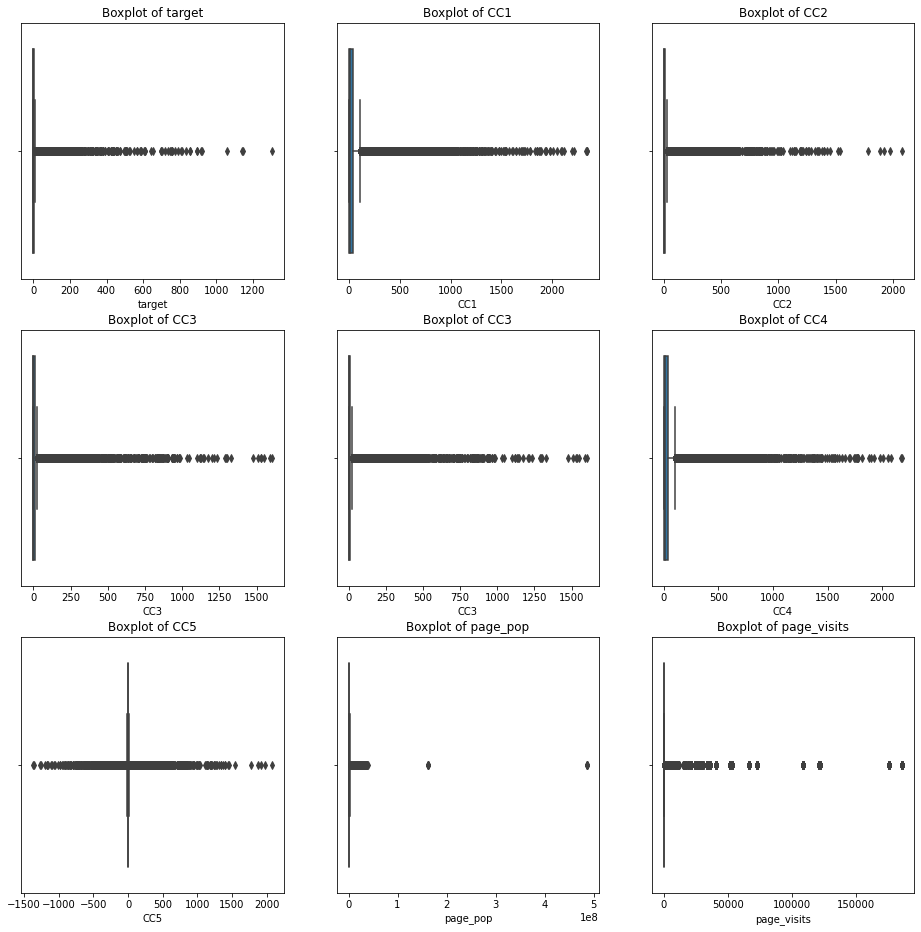

In [7]:
fig, axs = plt.subplots(ncols=3,nrows=3,figsize=(16,16))

sns.boxplot(x=df["target"],ax=axs[0][0])
axs[0][0].set_title('Boxplot of target')

sns.boxplot(x=df["CC1"],ax=axs[0][1])
axs[0][1].set_title('Boxplot of CC1')

sns.boxplot(x=df["CC2"],ax=axs[0][2])
axs[0][2].set_title('Boxplot of CC2')

sns.boxplot(x=df["CC3"],ax=axs[1][0])
axs[1][0].set_title('Boxplot of CC3')

sns.boxplot(x=df["CC3"],ax=axs[1][1])
axs[1][1].set_title('Boxplot of CC3')

sns.boxplot(x=df["CC4"],ax=axs[1][2])
axs[1][2].set_title('Boxplot of CC4')

sns.boxplot(x=df["CC5"],ax=axs[2][0])
axs[2][0].set_title('Boxplot of CC5')

sns.boxplot(x=df["page_pop"],ax=axs[2][1])
axs[2][1].set_title('Boxplot of page_pop')

sns.boxplot(x=df["page_visits"],ax=axs[2][2])
axs[2][2].set_title('Boxplot of page_visits')

We have several discrepencies between the features : 
- scale
- density


### post_promo values

In [8]:
list(set(df.post_promo.values.tolist()))

[0]

post_promo contains only 0's : this feature is not interesting for our model

## distribution

c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of target')

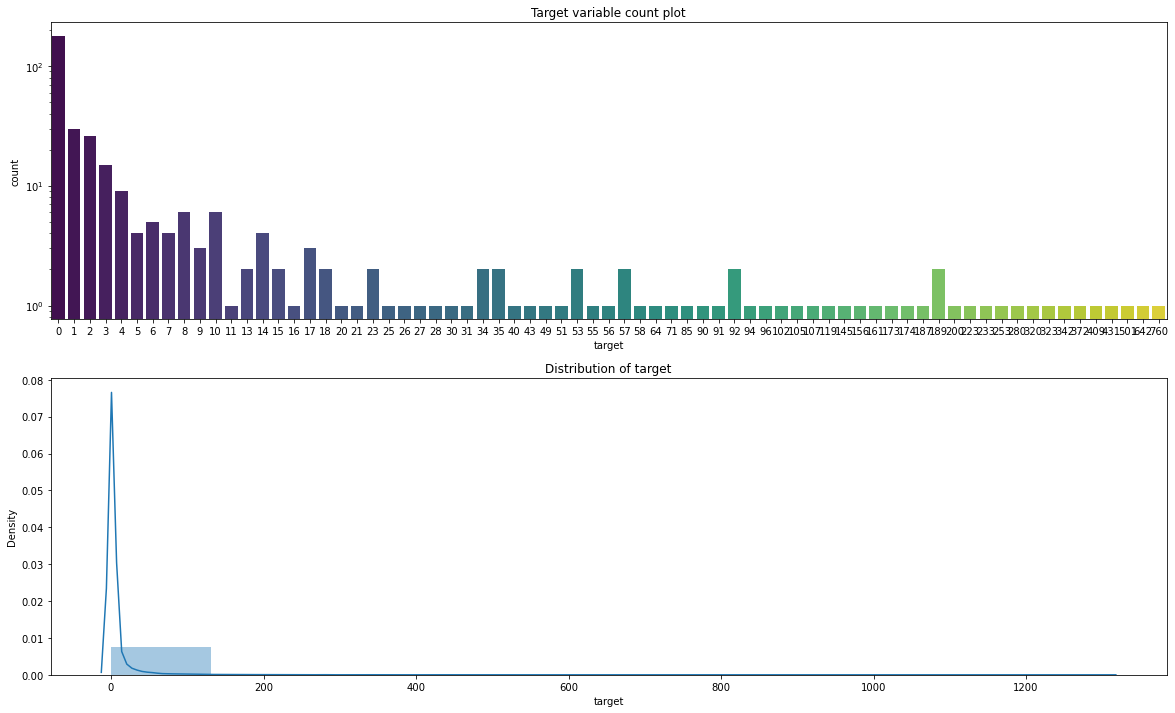

In [9]:
f,axs=plt.subplots(figsize=(20,12),nrows=2)
values=list(set(df.target.astype('int')))
sns.countplot(values,data=df.target.astype('int'), palette= 'viridis',ax=axs[0])
axs[0].set(yscale='log')
axs[0].set_title('Target variable count plot')

sns.distplot(df.target,bins=10,ax=axs[1])
axs[1].set_title('Distribution of target')

A large amount of posts won't get any comments. 

c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

Text(0.5, 0.98, 'Density plot of CC1, CC2, CC3, CC4, CC5')

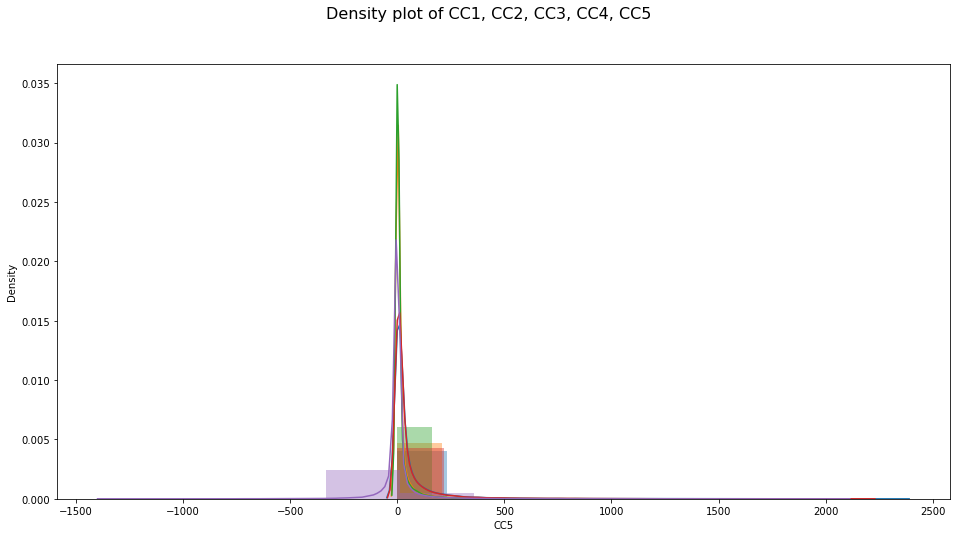

In [10]:
fig=plt.figure(figsize=(16, 8))
sns.distplot(df.CC1,bins=10)
sns.distplot(df.CC2,bins=10)
sns.distplot(df.CC3,bins=10)
sns.distplot(df.CC4,bins=10)
sns.distplot(df.CC5,bins=10)
fig.suptitle('Density plot of CC1, CC2, CC3, CC4, CC5', fontsize=16)

c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

Text(0.5, 0.98, 'Density plot of cc1_min, cc1_max, cc1_std,cc1_avg,')

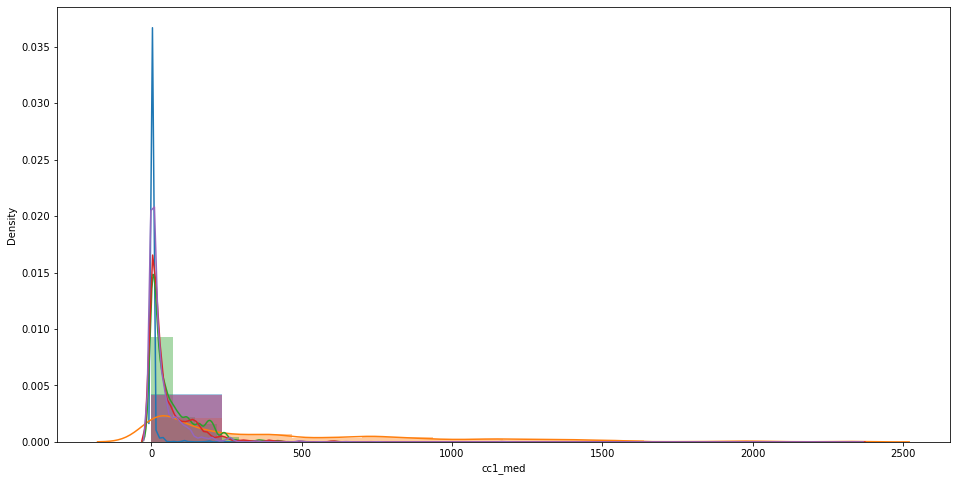

In [11]:
plt.figure(figsize=(16, 8))
sns.distplot(df.cc1_min,bins=10)
sns.distplot(df.cc1_max,bins=10)
sns.distplot(df.cc1_std,bins=10)
sns.distplot(df.cc1_avg,bins=10)
sns.distplot(df.cc1_med,bins=10)
fig.suptitle('Density plot of cc1_min, cc1_max, cc1_std,cc1_avg,', fontsize=16)

## correlation 

In [12]:
plt.figure(figsize=(18, 9))
sns.set(style="whitegrid")
corr = df.corr()
corr

,page_pop,page_visits,page_interest,page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
page_pop,1.000000,0.044839,0.623436,-0.042167,0.059575,0.158714,0.166425,0.145216,0.174597,0.015750,...,-0.009503,0.003397,-0.003665,0.006125,-0.000433,0.003840,0.006070,-0.003045,-0.008862,0.058918
page_visits,0.044839,1.000000,0.166850,-0.060181,-0.002830,0.169236,0.154968,0.121734,0.178410,-0.003997,...,-0.005844,0.007936,-0.000324,0.008330,0.002385,-0.006826,0.000313,0.000873,-0.004329,0.022982
page_interest,0.623436,0.166850,1.000000,-0.148685,0.181432,0.482016,0.518604,0.455487,0.541041,0.059709,...,-0.027627,-0.007700,-0.016521,-0.001683,0.006739,0.020424,0.024486,-0.011423,-0.022755,0.177330
page_category,-0.042167,-0.060181,-0.148685,1.000000,-0.041646,-0.313601,-0.229936,-0.188769,-0.288469,-0.011617,...,0.002942,-0.002263,0.008858,-0.004926,-0.008104,-0.003160,-0.002917,0.011931,-0.001835,-0.073673
cc1_min,0.059575,-0.002830,0.181432,-0.041646,1.000000,0.127576,0.474400,0.551731,0.202030,0.610646,...,-0.006791,-0.006288,0.000411,-0.005560,0.003863,0.004396,0.006181,-0.000473,-0.009087,0.156940
cc1_max,0.158714,0.169236,0.482016,-0.313601,0.127576,1.000000,0.706975,0.574617,0.895083,0.045730,...,-0.010858,-0.007634,-0.009277,-0.002204,0.003126,0.010823,0.005458,-0.001994,-0.006246,0.231432
cc1_avg,0.166425,0.154968,0.518604,-0.229936,0.474400,0.706975,1.000000,0.963965,0.894524,0.222304,...,-0.017237,-0.004111,-0.007631,-0.006261,0.007653,0.005512,0.013246,-0.001624,-0.011320,0.334986
cc1_med,0.145216,0.121734,0.455487,-0.188769,0.551731,0.574617,0.963965,1.000000,0.765472,0.266495,...,-0.015482,-0.002106,-0.005210,-0.007170,0.008770,0.001387,0.012772,-0.001196,-0.009712,0.325367
cc1_std,0.174597,0.178410,0.541041,-0.288469,0.202030,0.895083,0.894524,0.765472,1.000000,0.062964,...,-0.016389,-0.009239,-0.011792,-0.006018,0.004579,0.012609,0.013428,-0.003172,-0.010236,0.300229
cc2_min,0.015750,-0.003997,0.059709,-0.011617,0.610646,0.045730,0.222304,0.266495,0.062964,1.000000,...,-0.004967,-0.004455,-0.003601,-0.005171,-0.000542,0.011366,0.001631,0.001868,-0.005928,0.103345


<Figure size 1296x648 with 0 Axes>

<ipython-input-13-dbf07cc1e00a>:10: UserWarning: Attempting to set identical bottom == top == 0.5 results in singular transformations; automatically expanding.
  plt.ylim(b, t)


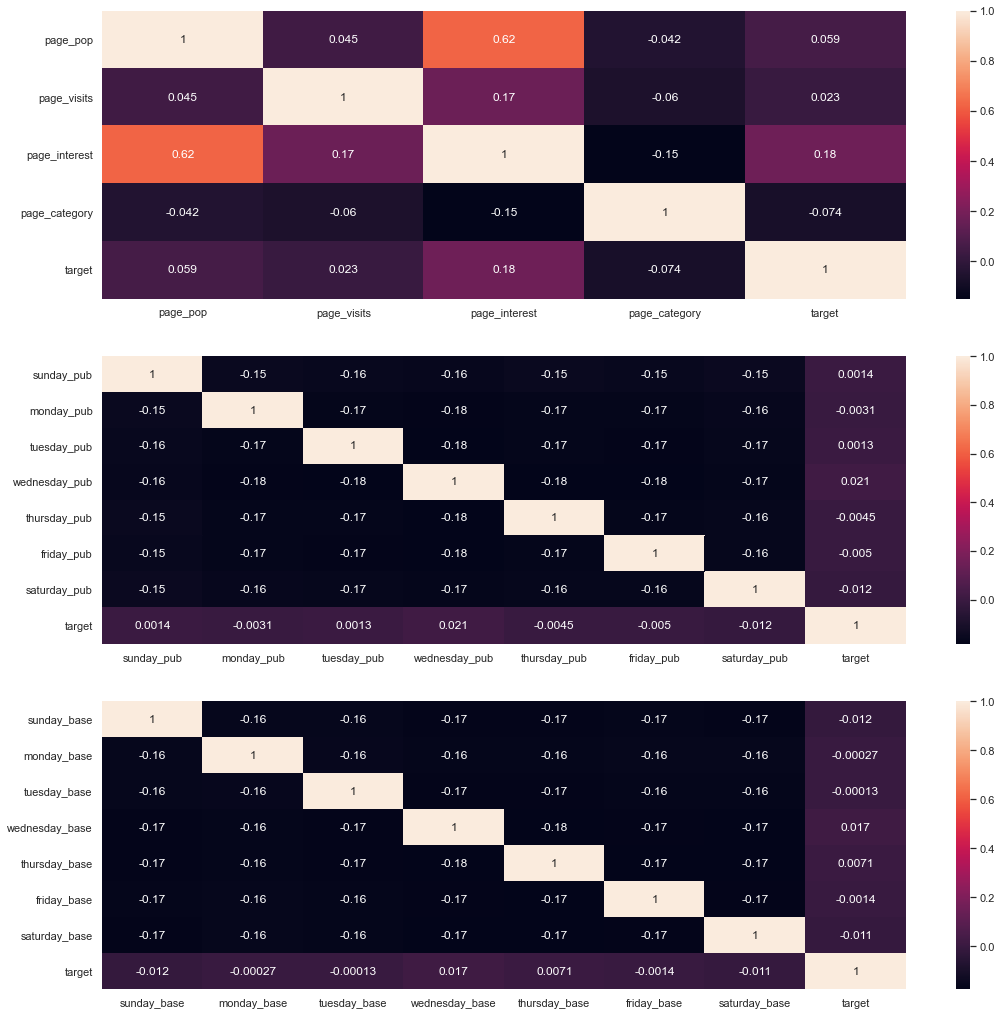

In [13]:
fig,axs=plt.subplots(figsize=(18, 18),nrows=3)

corr1=['page_pop','page_visits','page_interest','page_category','target']
sns.set(style="whitegrid")
corr = df[corr1].corr()
sns.heatmap(corr,annot=True,ax=axs[0])
b, t = plt.ylim()
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 

corr2=['sunday_pub','monday_pub','tuesday_pub','wednesday_pub','thursday_pub','friday_pub','saturday_pub','target']
sns.set(style="whitegrid")
corr = df[corr2].corr()
sns.heatmap(corr,annot=True,ax=axs[1])

corr3=['sunday_base','monday_base','tuesday_base','wednesday_base','thursday_base','friday_base','saturday_base','target']
sns.set(style="whitegrid")
corr = df[corr3].corr()
sns.heatmap(corr,annot=True,ax=axs[2])


plt.show() 

The day on which the post is published has very little impact on the target variable. 

## Categories

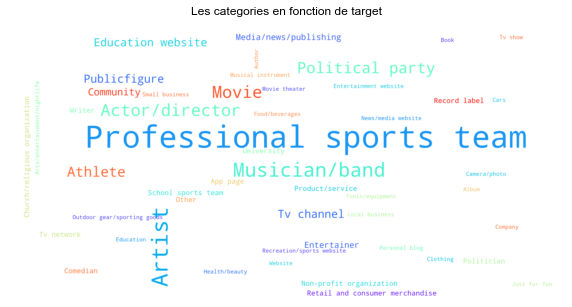

In [14]:
# 106 categories differentes 
category_val=df['page_category'].values.tolist()

category=['Product/service','Publicfigure','Retail and consumer merchandise','Athlete','Education website','Arts/entertainment/nightlife','Aerospace/defense',
          'Actor/director','Professional sports team','Travel/leisure','Arts/humanities website','Food/beverages','Record label','Movie','Song','Community',
          'Company','Artist','Non-governmental organization (ngo)','Media/news/publishing','Cars','Clothing','Local business','Musician/band','Politician',
          'News/media website','Education','Author','Sports event','Restaurant/cafe','School sports team','University','Tv show','Website','Outdoor gear/sporting goods',
          'Political party','Sports league','Entertainer','Church/religious organization','Non-profit organization','Automobiles and parts','Tv channel','Telecommunication',
          'Entertainment website','Shopping/retail','Personal blog','App page','Vitamins/supplements','Professional services','Movie theater','Software','Magazine','Electronics',
          'School', 'Just for fun','Club','Comedian','Sports venue','Sports/recreation/activities','Publisher','Tv network','Health/medical/pharmacy',
          'Studio','Home decor','Jewelry/watches','Writer','Health/beauty','Music video','Appliances','Computers/technology','Insurance company',
          'Music award','Recreation/sports website','Reference website','Business/economy website','Bar','Album','Games/toys','Camera/photo','Book','Producer',
          'Landmark','Cause','Organization','Tv/movie award','Hotel','Health/medical/pharmaceuticals','Transportation','Local/travel website','Musical instrument',
          'Radio station','Other','Computers','Phone/tablet','Coach','Tools/equipment','Internet/software','Bank/financial institution','Society/culture website','Small business',
          'News personality','Teens/kids website','Government official','Photographer','Spas/beauty/personal care','Video game']

to_category=[category[i-1]for i in category_val]
sum_category=[0 for i in range(len(category))]

target=df['target'].values.tolist()
for idx,y in enumerate(category_val):
    sum_category[y-1]+=target[idx]

dic_category=dict(zip(category,sum_category))
    
wc1 = WordCloud(scale=10,colormap="rainbow",background_color="white",collocations=False).generate_from_frequencies(dic_category)
plt.figure(figsize=(10,10))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Les categories en fonction de target",color='black')
plt.show()

The category of the post has influence over the target variable. Indeed, some posts with particular categories get more comments than others. 

## influence of CC features

<Figure size 864x864 with 0 Axes>

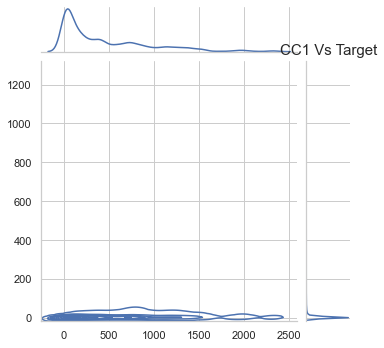

In [15]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df["cc1_max"].values, y=df['target'].values, height=5, kind="kde")
plt.ylabel('Target', fontsize=12)
plt.xlabel("cc1_max", fontsize=12)
plt.title("CC1 Vs Target", fontsize=15);

## Influence of H 

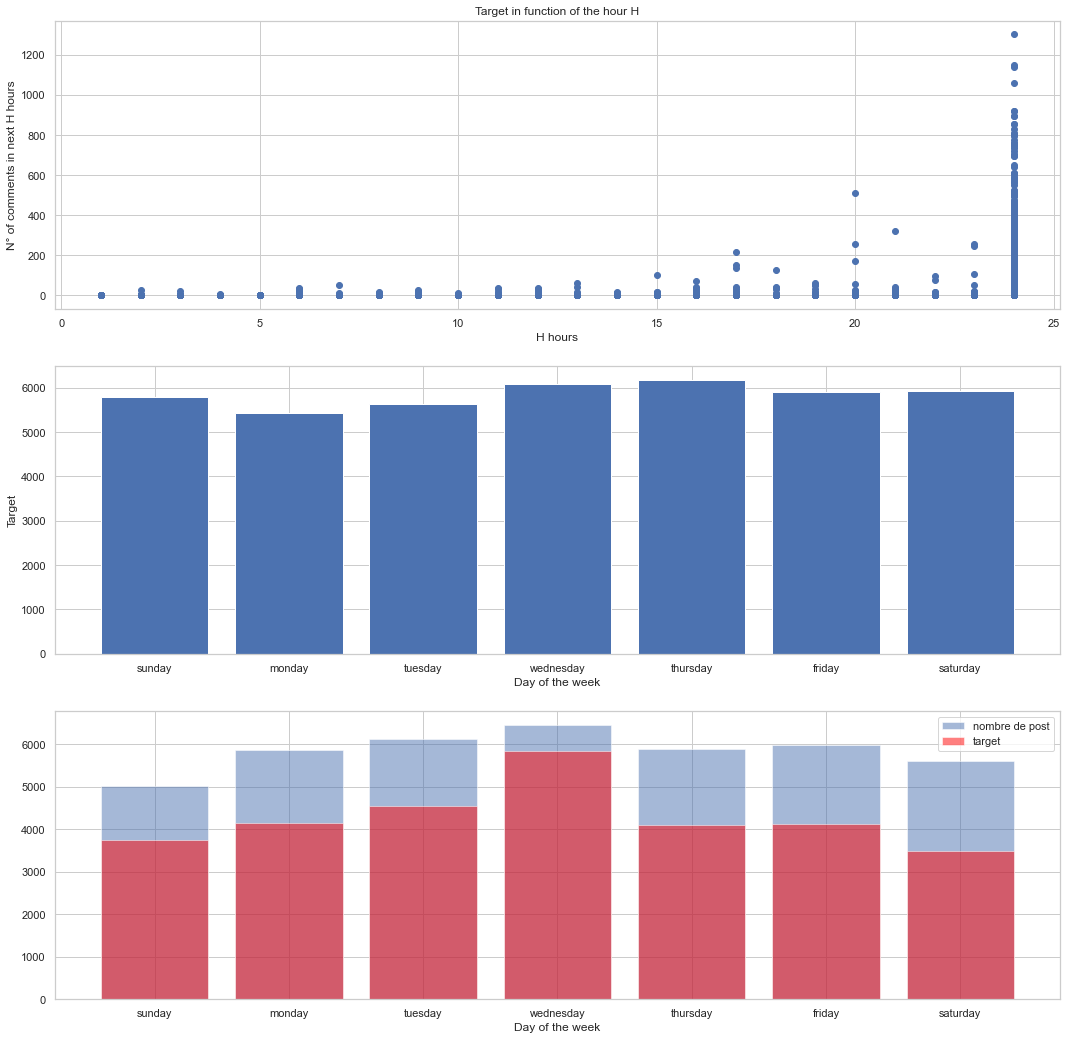

In [16]:
fig,axs=plt.subplots(figsize=(18, 18),nrows=3)

x = df.hour_target
y = df.target
axs[0].scatter(x, y)
axs[0].set_ylabel("N° of comments in next H hours")
axs[0].set_xlabel("H hours")
axs[0].set_title("Target in function of the hour H")

y_ele=[df.sunday_base,df.monday_base,df.tuesday_base,df.wednesday_base,df.thursday_base,df.friday_base,df.saturday_base]
names=["sunday","monday","tuesday","wednesday","thursday","friday","saturday"]
days=[0,0,0,0,0,0,0]
sum_comments=[0,0,0,0,0,0,0]
for idx,y in enumerate(y_ele):
    for q in y:
        if q == 1:
            days[idx]+=1
axs[1].bar(names,days)
axs[1].set_xlabel("Day of the week")
axs[1].set_ylabel("Target")


y_ele=[df.sunday_pub,df.monday_pub,df.tuesday_pub,df.wednesday_pub,df.thursday_pub,df.friday_pub,df.saturday_pub]
y_target=df.target.values.tolist()
names=["sunday","monday","tuesday","wednesday","thursday","friday","saturday"]
days=[0,0,0,0,0,0,0]
sum_comments=[0,0,0,0,0,0,0]
for idx,y in enumerate(y_ele):
    for j,q in enumerate(y):
        if q == 1:
            sum_comments[idx]+=df.target[j]
            days[idx]+=1
sum_comments_=[i/10 for i in sum_comments]
axs[2].bar(names,days,alpha=0.5,label="nombre de post")
axs[2].bar(names,sum_comments_,alpha=0.5,label="target",color='red')
axs[2].legend(loc='upper right')
axs[2].set_xlabel("Day of the week")

plt.show()


We can see a hierachy when we watch at the time in regard of the target feature. We can consider the features hour_target and hour_base as being continuous. 

## Page_pop and page_visits

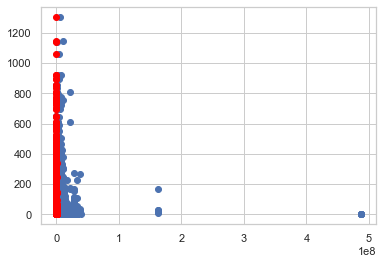

In [17]:
plt.scatter(x=df.page_pop, y=df.target)
plt.scatter(x=df.page_visits,y=df.target,color='red')

# PRE-PROCESS

In [61]:
df_new = pd.read_csv(url,header=None,names=columns)
df_new.head()

,page_pop,page_visits,page_interest,page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


## new variables

In [62]:
df_new['meanCC']=(df_new['CC2']+df_new['CC3']+df_new['CC4'])/3

## drop post_promo

In [63]:
df_new=df_new.drop(columns='post_promo')

## dummification of category features

- post_category is between 1 and 106 : if we leave it like this might infer a hierarchy between the different categories

In [64]:
dummy_category=pd.get_dummies(df['page_category'],prefix="category_")
dummy_category.head()
col=dummy_category.columns.tolist()
## some categories are not contained in the training data : we created columns 
for i in range (1,107):
    if 'category__'+str(i) not in col:
        dummy_category['category__'+str(i)]=[0 for i in range(40949)]      

## Scaling

In [65]:
features=['sunday_base','monday_base','tuesday_base','wednesday_base','thursday_base','friday_base','saturday_base',
                    'page_pop','page_visits','page_interest',
                    'cc1_min','cc1_max','cc1_avg','cc1_med','cc1_std',
                    'cc2_min','cc2_max','cc2_avg','cc2_med','cc2_std',
                    'cc3_min','cc3_max','cc3_avg','cc3_med','cc3_std',
                    'cc4_min','cc4_max','cc4_avg','cc4_med','cc4_std',
                    'cc5_min','cc5_max','cc5_avg','cc5_med','cc5_std',
                    'CC1','CC2','CC3','CC4','CC5','meanCC',
                    'base_time','post_length','post_shares','hour_target'
                   ]

In [66]:
X=pd.concat([df_new[features],dummy_category],axis=1)
print(X)
y=df_new['target']

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=2)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test) 

       sunday_base  monday_base  tuesday_base  wednesday_base  thursday_base  \
0                0            0             0               0              0   
1                0            0             0               0              0   
2                0            0             0               0              0   
3                0            1             0               0              0   
4                0            0             0               1              0   
...            ...          ...           ...             ...            ...   
40944            0            0             0               0              0   
40945            0            0             0               0              0   
40946            0            0             0               0              1   
40947            0            0             0               0              0   
40948            0            0             0               0              0   

       friday_base  saturday_base  page

In [26]:
import pickle
ModelFile='fitData.pkl'

with open(ModelFile, 'wb') as file:
    pickle.dump(scaler, file)

print('Done')

Done


# MODELS

# Regression Trees

In [27]:
from sklearn.tree import DecisionTreeRegressor

decisionTree=DecisionTreeRegressor()
decisionTree.fit(X_train,y_train)
y_pred=decisionTree.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mse
rmse=np.sqrt(mse)
rmse

28.335440038971704

## Random Forest 

In [28]:
from sklearn.ensemble import RandomForestRegressor 

regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

r2=r2_score(y_test,y_pred)

print('rmse',rmse,'r2',r2)

rmse 20.883292205130953 r2 0.6702726730686355


In [29]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### hyper-parameters optimization

#### random-search 

In [31]:
n_estimators = [int(x) for x in np.linspace(start=10,stop=120,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 32, 32, endpoint=True)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 44.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 22, 34, 46, 58, 71,
                                                         83, 95, 107, 120]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 58,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [18]:
y_pred=rf_random.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(rmse, r2)

20.21591363500833 0.691010473865847


#### grid search

In [12]:
parameters={'n_estimators': [int(x) for x in np.linspace(start=10,stop=120,num=10)]}

grid=GridSearchCV(RandomForestRegressor(),parameters)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.6221107683900217 RandomForestRegressor(n_estimators=95)


In [18]:
parameters={'max_features':['auto', 'sqrt'],'n_estimators': [int(x) for x in np.linspace(start=90,stop=120,num=5)]}
grid=GridSearchCV(RandomForestRegressor(),parameters)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.624430977369727 RandomForestRegressor(n_estimators=90)


In [32]:
## best param : 90 estimators & auto max_features

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

31.34582743976441

## Gradient Boosting

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(rmse,r2)

19.848795087907355 0.7021309997896877


#### random-search

In [19]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=10,stop=120,num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 32, 32, endpoint=True)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

reg = GradientBoostingRegressor(random_state=0)

reg_random = RandomizedSearchCV(estimator = reg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
reg_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 68.8min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 22, 34, 46, 58, 71,
                                                         83, 95, 107, 120]},
                   random_state=42, verbose=2)

In [20]:
reg_random.best_params_

{'n_estimators': 95,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 6}

#### grid-search

In [16]:
parameters={'n_estimators': [int(x) for x in np.linspace(start=90,stop=120,num=10)]}

grid=GridSearchCV(GradientBoostingRegressor(),parameters)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.6248023749514606 GradientBoostingRegressor(n_estimators=116)


In [17]:
parameters={'n_estimators': [int(x) for x in np.linspace(start=90,stop=120,num=10)],
            'max_features':['auto', 'sqrt']}

grid=GridSearchCV(GradientBoostingRegressor(),parameters)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.6236891812765449 GradientBoostingRegressor(max_features='auto', n_estimators=110)


#### best GB

In [52]:
gbr=GradientBoostingRegressor(n_estimators=116,max_features='auto')
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_features='auto', n_estimators=116)

In [51]:
y_pred=gbr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(rmse,r2)

19.688256117824597 0.7069299004386624


## which model to choose ? 

In [46]:
perf=[0.6236891812765449,0.6248023749514606,0.624430977369727,0.6221107683900217]
algo=['GBR:2nd Grid Search','GBR:1st Grid Search','RF:2nd Grid Search','RF:1st Grid Search']
d={'performance':perf,'model':algo}
df_res=pd.DataFrame(d)

print(df_res)

   performance                model
0     0.623689  GBR:2nd Grid Search
1     0.624802  GBR:1st Grid Search
2     0.624431   RF:2nd Grid Search
3     0.622111   RF:1st Grid Search


In [70]:
models=[]

models.append(('GBR 1',GradientBoostingRegressor(n_estimators=116,max_features='auto')))
models.append(('GBR 2', GradientBoostingRegressor(n_estimators=110,max_features='auto')))
models.append(('RF 1', RandomForestRegressor(n_estimators=90)))

results = []
names = []
scoring = 'mse'

def rmse(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    return np.sqrt(mse)

rmse_score=make_scorer(rmse)

for name, model in models:
    #train, test splits
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    #the results
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=rmse_score)
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

GBR 1: 21.213927 (4.177606)


c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GBR 2: 21.245310 (4.182683)


c:\users\julie\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RF 1: 21.764288 (3.658013)


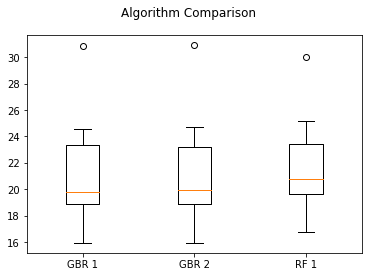

In [71]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Export model

In [72]:
# modelPickle.pkl

import pickle

ModelFile='modelPickle.pkl'

with open(ModelFile, 'wb') as file:
    pickle.dump(gbr, file)

print('Done')

Done
